In [136]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [145]:
image1 = tf.keras.utils.load_img("mic1.jpeg")
image2 = tf.keras.utils.load_img("mic2.jpeg")

In [146]:
def reshape(image):
    image = np.array(image)
    image.shape
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    #image = tf.image.rgb_to_grayscale(image)
    temp = tf.keras.utils.array_to_img(image)
    print(image.shape)
    plt.imshow(temp)
    plt.show()
    return image

(224, 224, 3)


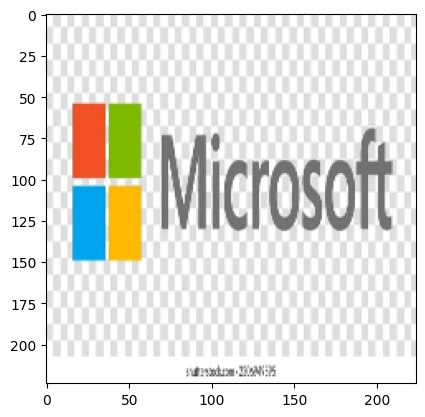

(224, 224, 3)


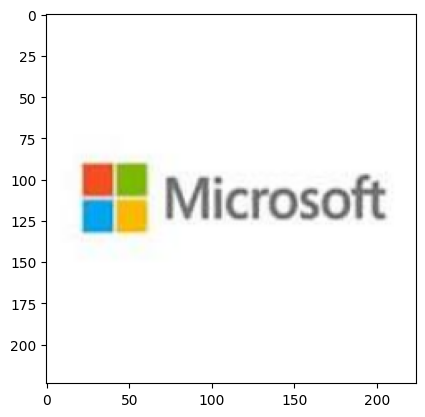

In [147]:
img1 = reshape(image1)
img2 = reshape(image2)

In [148]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [149]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [150]:
def get_image_embeddings(object_image : image):
    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [151]:
def get_similarity_score(first_image, second_image):
    # first_image = load_image(first_image)
    # second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [152]:
get_similarity_score(img1,img2)

1/1 [==============================] - 0s 20ms/step


array([0.88803506], dtype=float32)